In [30]:
# Import modules
import pprint
from time import time
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import anderson
import umap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [17]:
# Data Loading
train_df = pd.read_csv("D:/sctp/datasets/train.csv", sep = ",")
test_df = pd.read_csv("D:/sctp/datasets/test.csv", sep = ",")
train_df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [18]:
train_df.head(10)

# Number of features are 199. Try to reduce a few features

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
6,train_6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097
7,train_7,0,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,...,13.1700,6.5491,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806
8,train_8,0,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,...,1.4298,14.7510,1.6395,1.4181,14.8370,-1.9940,-1.0733,8.1975,19.5114,4.8453
9,train_9,0,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,...,0.5543,6.3160,1.0371,3.6885,14.8344,0.4467,14.1287,7.9133,16.2375,14.2514


89.95100000000001


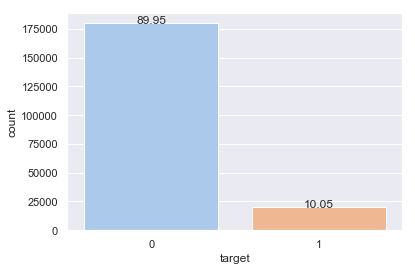

In [19]:
# Checking for Class balance.

sb.set(style="darkgrid")

sb.set_palette('pastel')

ax = sb.countplot(x = 'target', data = train_df)

total = float(len(train_df))

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center")
    
df2 = train_df.groupby(by='target', as_index=False).agg({'ID_code': pd.Series.nunique})

print((df2.iloc[0]['ID_code']/(df2.iloc[0]['ID_code']+df2.iloc[1]['ID_code']))*100)

# A class imbalance problem.

In [20]:
# Check for missing values
train_df.isnull().any().any()

False

In [22]:
x = train_df.drop('target', axis=1)
y = train_df['target']
x = x.drop(['ID_code'], axis=1)

In [23]:
# Test for normality
normality_test ={}
for name, values in x.iteritems():
    result = anderson(values)
    name = name + '_significance_level_' + str(result.significance_level[2])
    normality_test.update({name: result.critical_values[2]})

fail_vars = {}
for key,values in normality_test.items():
    if values <= 0.5:
        fail_vars.update({key:value})

if len(fail_vars) == 0:
    print('All variables are Normal') 

All variables are Normal


In [24]:
# Scaling: Currently using minmax scaler. based on results will explore robust scaler
scaler = MinMaxScaler()
x[x.columns] = scaler.fit_transform(x[x.columns])
normality_test_trans ={}
for name, values in x.iteritems():
    result = anderson(values)
    name = name + '_significance_level_' + str(result.significance_level[2])
    normality_test_trans.update({name: result.critical_values[2]})
fail_vars = {}
for key,values in normality_test.items():
    if values <= 0.5:
        fail_vars.update({key:value})

if len(fail_vars) == 0:
    print('All scaled variables are Normal')

All scaled variables are Normal


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42, 
                                                    stratify = y)

print(y_test.value_counts())
print(y_train.value_counts())

0    59368
1     6632
Name: target, dtype: int64
0    120534
1     13466
Name: target, dtype: int64


In [25]:
# Dimentionality Reduction
pca = PCA().fit(x_train)

for eachVariance in pca.explained_variance_ratio_:
    if eachVariance >= 0.5:
        print (f'Explained variance by component: {print(eachVariance)}')


In [26]:
# UMAP
n_neighbors = 10
t0 = time()
reducer=umap.UMAP(n_neighbors=n_neighbors,
                min_dist=0.5,
                metric='correlation',
                random_state=42)

embedding = reducer.fit_transform(x_train)
t1 = time()
print("UMAP: %.2g sec" % (t1 - t0))

print(embedding)
# bn_components=n_components,

UMAP: 2.8e+02 sec
[[-0.2317377  -0.53898525]
 [-0.53874046 -1.5748761 ]
 [-2.2174227   0.5519394 ]
 ...
 [-2.3316364  -1.9566423 ]
 [-1.2228426   0.4871788 ]
 [ 0.50093913  0.6924098 ]]


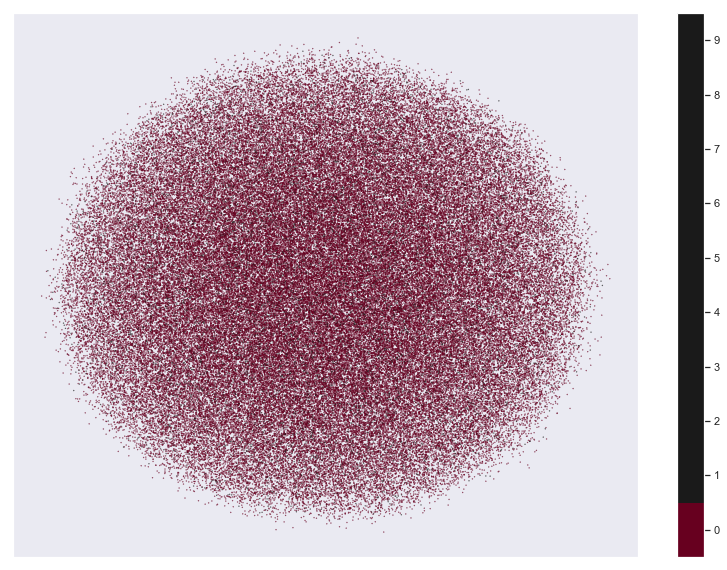

In [27]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.1, c=y_train, cmap='RdGy', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))

In [44]:
# Stratified Kfold Cross Validation. Need use smote if required
# Example parameter grid: parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
t0 = time()
rfc = RandomForestClassifier()
parameters = {
                'n_estimators': [200, 300], 
                'criterion':['gini'], 
                'max_depth':[None], 
                'min_samples_split':[1500, 750], 
                'min_samples_leaf':[3000, 1500], 
                'n_jobs':[-1], 
                'random_state':[123], 
                'class_weight':['balanced_subsample', 'balanced']
            }

rf_clf = GridSearchCV(estimator = rfc, param_grid = parameters, cv=10, scoring = 'roc_auc', return_train_score=True)
rf_clf.fit(x_train, y_train)
cv_results = pd.DataFrame.from_dict(rf_clf.cv_results_)
t1 = time()
delta_t = t1-t0
print('rfc:{:2.2f}'.format(delta_t))

KeyboardInterrupt: 

In [43]:
print(cv_results)
cv_results.to_csv('output_rf_200.csv')
filename = 'rf_model.sav'
pickle.dump(rf_clf, open(filename, 'wb'))

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      59.971231      2.701575         0.147786        0.043578   

   param_class_weight param_criterion param_max_depth param_min_samples_leaf  \
0  balanced_subsample            gini            None                   6000   

  param_min_samples_split param_n_estimators  ... split2_train_score  \
0                    3000                200  ...           0.786361   

  split3_train_score split4_train_score  split5_train_score  \
0           0.788119           0.787355            0.785447   

   split6_train_score  split7_train_score  split8_train_score  \
0            0.785709             0.78592            0.786303   

   split9_train_score  mean_train_score  std_train_score  
0            0.787922          0.786488         0.000916  

[1 rows x 38 columns]
